### Importing libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [168]:
housing_prices_train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")

In [89]:
housing_prices_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [90]:
housing_prices_train.sample(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
675,676,160,RL,24.0,2289,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,148500
1138,1139,20,RL,NaN,9819,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,WD,Normal,196000
1083,1084,20,RL,80.0,8800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,3,2006,WD,Normal,160000
437,438,45,RM,50.0,6000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2009,WD,Normal,119000
454,455,90,RL,63.0,9297,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Family,188000


In [91]:
housing_prices_train.drop('Id',inplace=True,axis=1)

In [92]:
num_features = [feature for feature in housing_prices_train.columns if housing_prices_train[feature].dtype != 'object']
len(num_features)

37

In [93]:
cat_features = [feature for feature in housing_prices_train.columns if housing_prices_train[feature].dtype == 'object']
len(cat_features)

43

In [94]:
housing_prices_train[cat_features].nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
BsmtFinType2      6
Heating           6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
GarageType        6
Foundation        6
Electrical        5
FireplaceQu       5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
ExterCond         5
BldgType          5
BsmtExposure      4
MiscFeature       4
Fence             4
LotShape          4
LandContour       4
BsmtCond          4
KitchenQual       4
MasVnrType        4
ExterQual         4
BsmtQual          4
LandSlope         3
GarageFinish      3
PavedDrive        3
PoolQC            3
Utilities         2
CentralAir        2
Street            2
Alley             2
dtype: int64

In [95]:
housing_prices_train.isna().sum().sort_values(ascending=False)[:10]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
dtype: int64

In [96]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

def preprocess_data(df):
    """
    Preprocesses the input DataFrame by imputing missing values and encoding categorical features.

    Parameters:
    df (pd.DataFrame): Input DataFrame with missing values and categorical features.

    Returns:
    pd.DataFrame: Preprocessed DataFrame with imputed values and encoded categorical features.
    """
    # Separate numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    categorical_cols = df.select_dtypes(include=['object']).columns

    # Impute missing values in numerical columns with mean
    imputer = SimpleImputer(strategy='mean')
    df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

    # Encode categorical columns using one-hot encoding
    encoder = OneHotEncoder(drop='first', sparse=False)
    encoded_categorical = encoder.fit_transform(df[categorical_cols])
    encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names(categorical_cols))
    
    # Combine numerical and encoded categorical features
    preprocessed_df = pd.concat([df[numerical_cols], encoded_df], axis=1)

    return preprocessed_df


In [97]:
train = preprocess_data(housing_prices_train)
train

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,62.0,7917.0,6.0,5.0,1999.0,2000.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,20.0,85.0,13175.0,6.0,6.0,1978.0,1988.0,119.0,790.0,163.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1457,70.0,66.0,9042.0,7.0,9.0,1941.0,2006.0,0.0,275.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,20.0,68.0,9717.0,5.0,6.0,1950.0,1996.0,0.0,49.0,1029.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


---

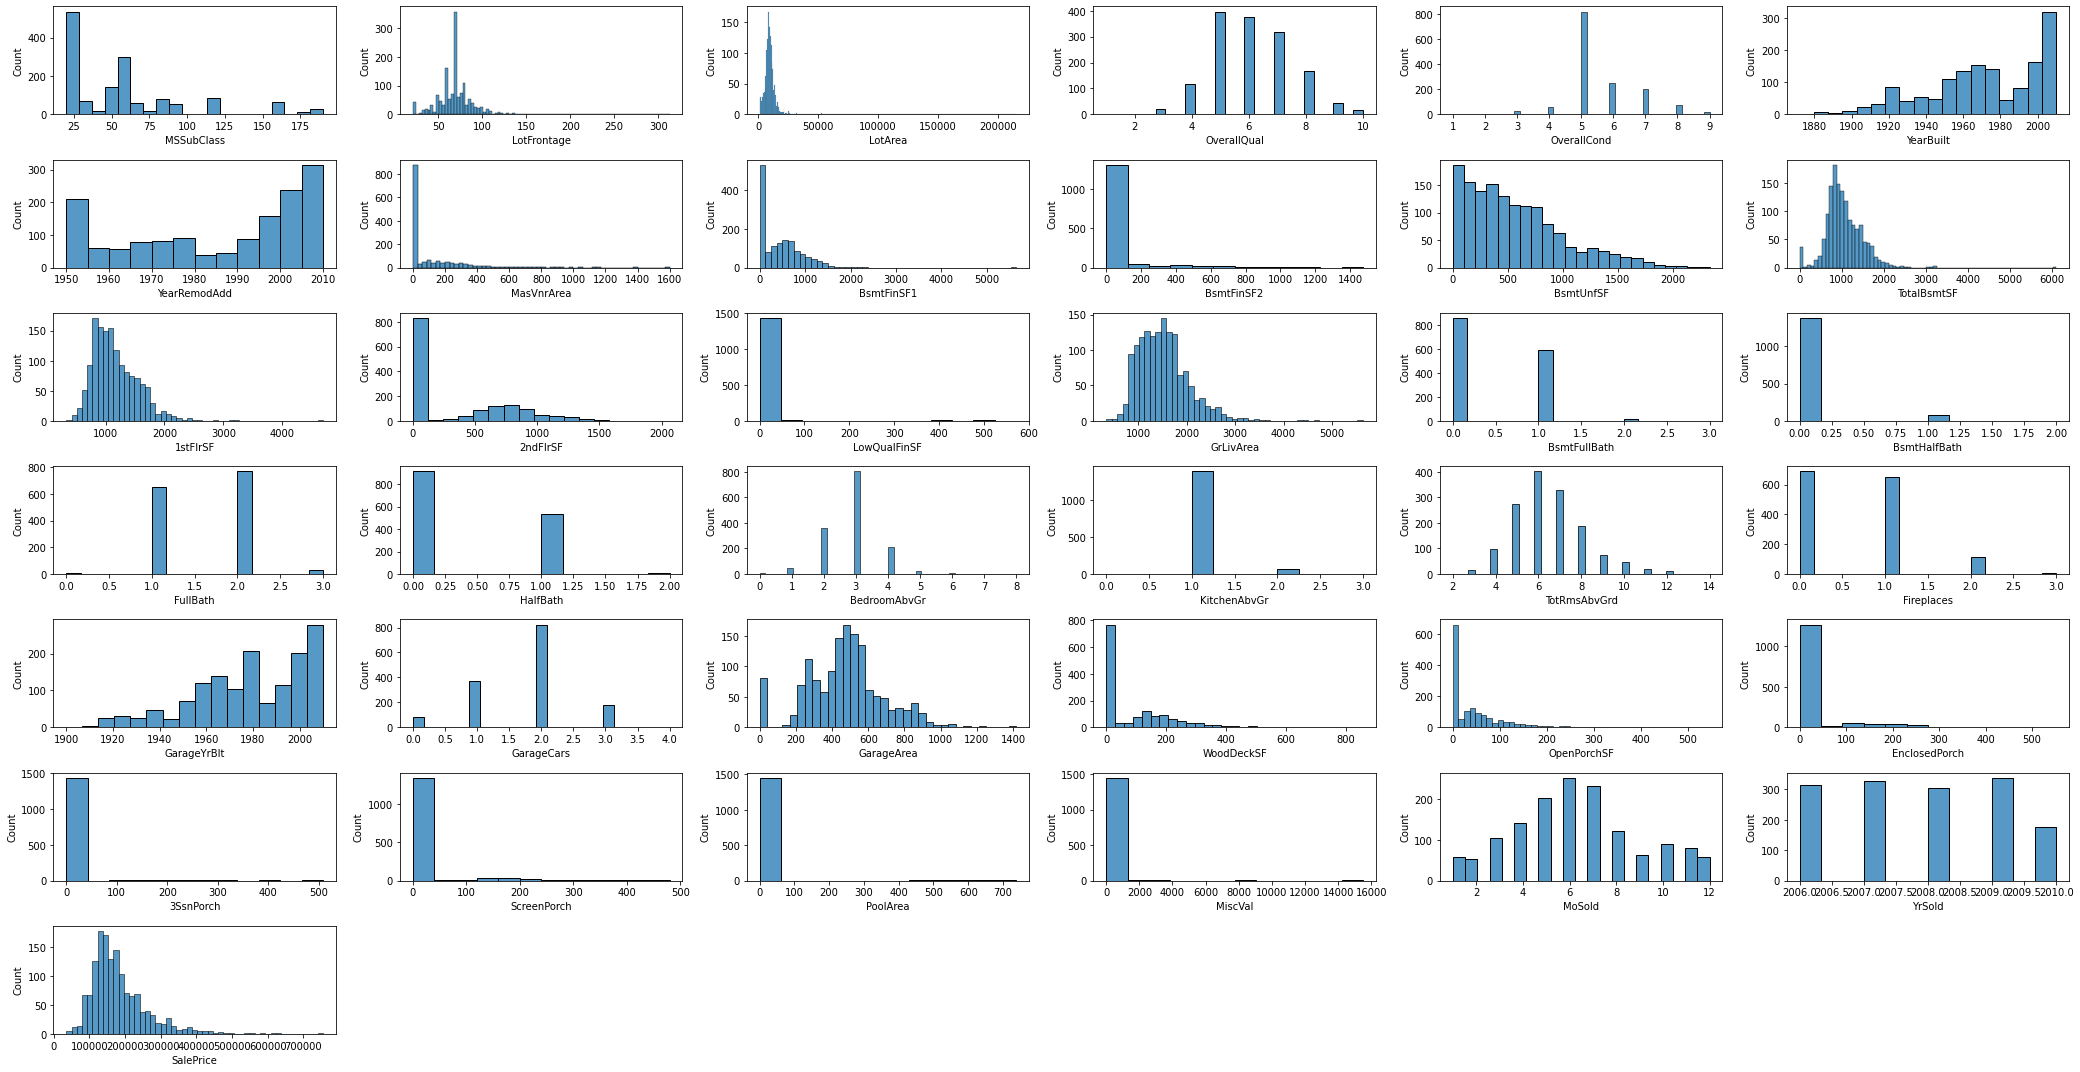

In [12]:
plt.figure(figsize=(29,15))

for i, feature in enumerate(num_features):
    plt.subplot(7, 6, i+1)
    sns.histplot(housing_prices_train[feature])
    plt.tight_layout()

### Simple Linear Regression Baseline
- Feature engineering upto modeling standards with no additional features and transformations.
- Establishing two baselines on:
 - Non-Scaled data 
 - Scaled data

In [98]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [99]:
y = train.pop('SalePrice')
X = train

In [100]:
RANDOM_STATE = 42
TEST_SIZE = 0.3

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=RANDOM_STATE, test_size= TEST_SIZE)

In [102]:
lr = LinearRegression()

In [103]:
lr.fit(X_train, y_train)
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [104]:
print(f'Training : {lr.score(X_train, y_train)}')
print(f'Testing  : {lr.score(X_test, y_test)}')

Training : 0.9407472896375583
Testing  : 0.02433703501829121


In [105]:
lr_preds = lr.predict(X_test)

In [106]:
def eval(y_test, preds):
    print(f'MAE : {mean_absolute_error(y_test, preds)}')
    print(f'MSE : {mean_squared_error(y_test, preds)}')
    print(f'R2  :{r2_score(y_test, preds)}')
    print(f'MAPE:{mean_absolute_percentage_error(y_test, preds)}\n')
    
    plt.figure(figsize=(20,7))
    plt.subplot(1,2,1)
    sns.distplot(y_test, kde=True, label="Actual")
    sns.distplot(preds, kde=True, label="Predicted")
    plt.legend()

MAE : 23911.267430381165
MSE : 6808267648.718407
R2  :0.02433703501829121
MAPE:0.139007233078276



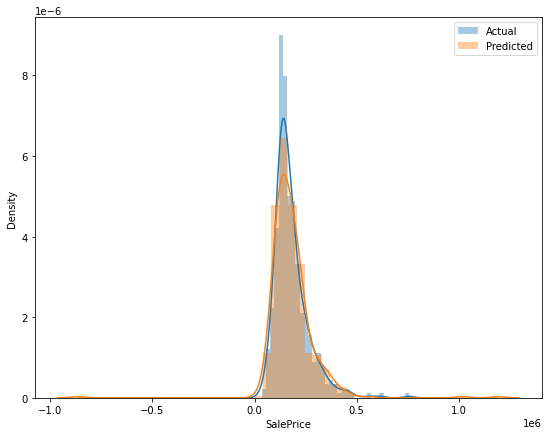

In [107]:
eval(y_test, lr_preds)

### Feature Engineering, Modeling

In [112]:
housing_prices_train[cat_features].nunique().sort_values(ascending=False)

Neighborhood     25
Exterior2nd      16
Exterior1st      15
SaleType          9
Condition1        9
Condition2        8
HouseStyle        8
RoofMatl          8
Functional        7
BsmtFinType2      6
Heating           6
RoofStyle         6
SaleCondition     6
BsmtFinType1      6
GarageType        6
Foundation        6
Electrical        5
FireplaceQu       5
HeatingQC         5
GarageQual        5
GarageCond        5
MSZoning          5
LotConfig         5
ExterCond         5
BldgType          5
BsmtExposure      4
MiscFeature       4
Fence             4
LotShape          4
LandContour       4
BsmtCond          4
KitchenQual       4
MasVnrType        4
ExterQual         4
BsmtQual          4
LandSlope         3
GarageFinish      3
PavedDrive        3
PoolQC            3
Utilities         2
CentralAir        2
Street            2
Alley             2
dtype: int64

In [113]:
housing_prices_train[['Neighborhood','Exterior1st','Exterior2nd']]

,Neighborhood,Exterior1st,Exterior2nd
0,CollgCr,VinylSd,VinylSd
1,Veenker,MetalSd,MetalSd
2,CollgCr,VinylSd,VinylSd
3,Crawfor,Wd Sdng,Wd Shng
4,NoRidge,VinylSd,VinylSd
...,...,...,...
1455,Gilbert,VinylSd,VinylSd
1456,NWAmes,Plywood,Plywood
1457,Crawfor,CemntBd,CmentBd
1458,NAmes,MetalSd,MetalSd


In [119]:
ex = housing_prices_train['Exterior1st'] +" "+ housing_prices_train['Exterior2nd']
ex

0       VinylSd VinylSd
1       MetalSd MetalSd
2       VinylSd VinylSd
3       Wd Sdng Wd Shng
4       VinylSd VinylSd
             ...       
1455    VinylSd VinylSd
1456    Plywood Plywood
1457    CemntBd CmentBd
1458    MetalSd MetalSd
1459    HdBoard HdBoard
Length: 1460, dtype: object

In [121]:
housing_prices_train['Exterior'] = housing_prices_train['Exterior1st'] +" "+ housing_prices_train['Exterior2nd']

In [122]:
housing_prices_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Exterior
0,60.0,RL,65.0,8450.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0.0,2.0,2008.0,WD,Normal,208500.0,VinylSd VinylSd
1,20.0,RL,80.0,9600.0,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0.0,5.0,2007.0,WD,Normal,181500.0,MetalSd MetalSd
2,60.0,RL,68.0,11250.0,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0.0,9.0,2008.0,WD,Normal,223500.0,VinylSd VinylSd
3,70.0,RL,60.0,9550.0,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,NaN,0.0,2.0,2006.0,WD,Abnorml,140000.0,Wd Sdng Wd Shng
4,60.0,RL,84.0,14260.0,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,NaN,0.0,12.0,2008.0,WD,Normal,250000.0,VinylSd VinylSd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60.0,RL,62.0,7917.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0.0,8.0,2007.0,WD,Normal,175000.0,VinylSd VinylSd
1456,20.0,RL,85.0,13175.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,MnPrv,NaN,0.0,2.0,2010.0,WD,Normal,210000.0,Plywood Plywood
1457,70.0,RL,66.0,9042.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,GdPrv,Shed,2500.0,5.0,2010.0,WD,Normal,266500.0,CemntBd CmentBd
1458,20.0,RL,68.0,9717.0,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,NaN,0.0,4.0,2010.0,WD,Normal,142125.0,MetalSd MetalSd


In [120]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [123]:
housing_prices_train['Exterior'] = le.fit_transform(housing_prices_train['Exterior'])
housing_prices_train['Neighborhood'] = le.fit_transform(housing_prices_train['Neighborhood'])

In [127]:
housing_prices_train.drop(['Exterior1st','Exterior2nd'], inplace=True, axis=1)

In [130]:
y = housing_prices_train.pop('SalePrice')

In [136]:
new_cols = housing_prices_train.select_dtypes(include='object').columns

In [137]:
for feature in new_cols:
    housing_prices_train[feature] = le.fit_transform(housing_prices_train[feature])

In [139]:
housing_prices_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Exterior
0,60.0,3,65.0,8450.0,1,2,3,3,0,4,...,0.0,3,4,4,0.0,2.0,2008.0,8,4,48
1,20.0,3,80.0,9600.0,1,2,3,3,0,2,...,0.0,3,4,4,0.0,5.0,2007.0,8,4,27
2,60.0,3,68.0,11250.0,1,2,0,3,0,4,...,0.0,3,4,4,0.0,9.0,2008.0,8,4,48
3,70.0,3,60.0,9550.0,1,2,0,3,0,0,...,0.0,3,4,4,0.0,2.0,2006.0,8,0,61
4,60.0,3,84.0,14260.0,1,2,0,3,0,2,...,0.0,3,4,4,0.0,12.0,2008.0,8,4,48


In [143]:
train1 = housing_prices_train.copy()

In [147]:
for feature in housing_prices_train.columns:
    train1[feature] = np.log1p(train1[feature]+0.001)

In [152]:
train_features = train1.columns
len(train_features)

78

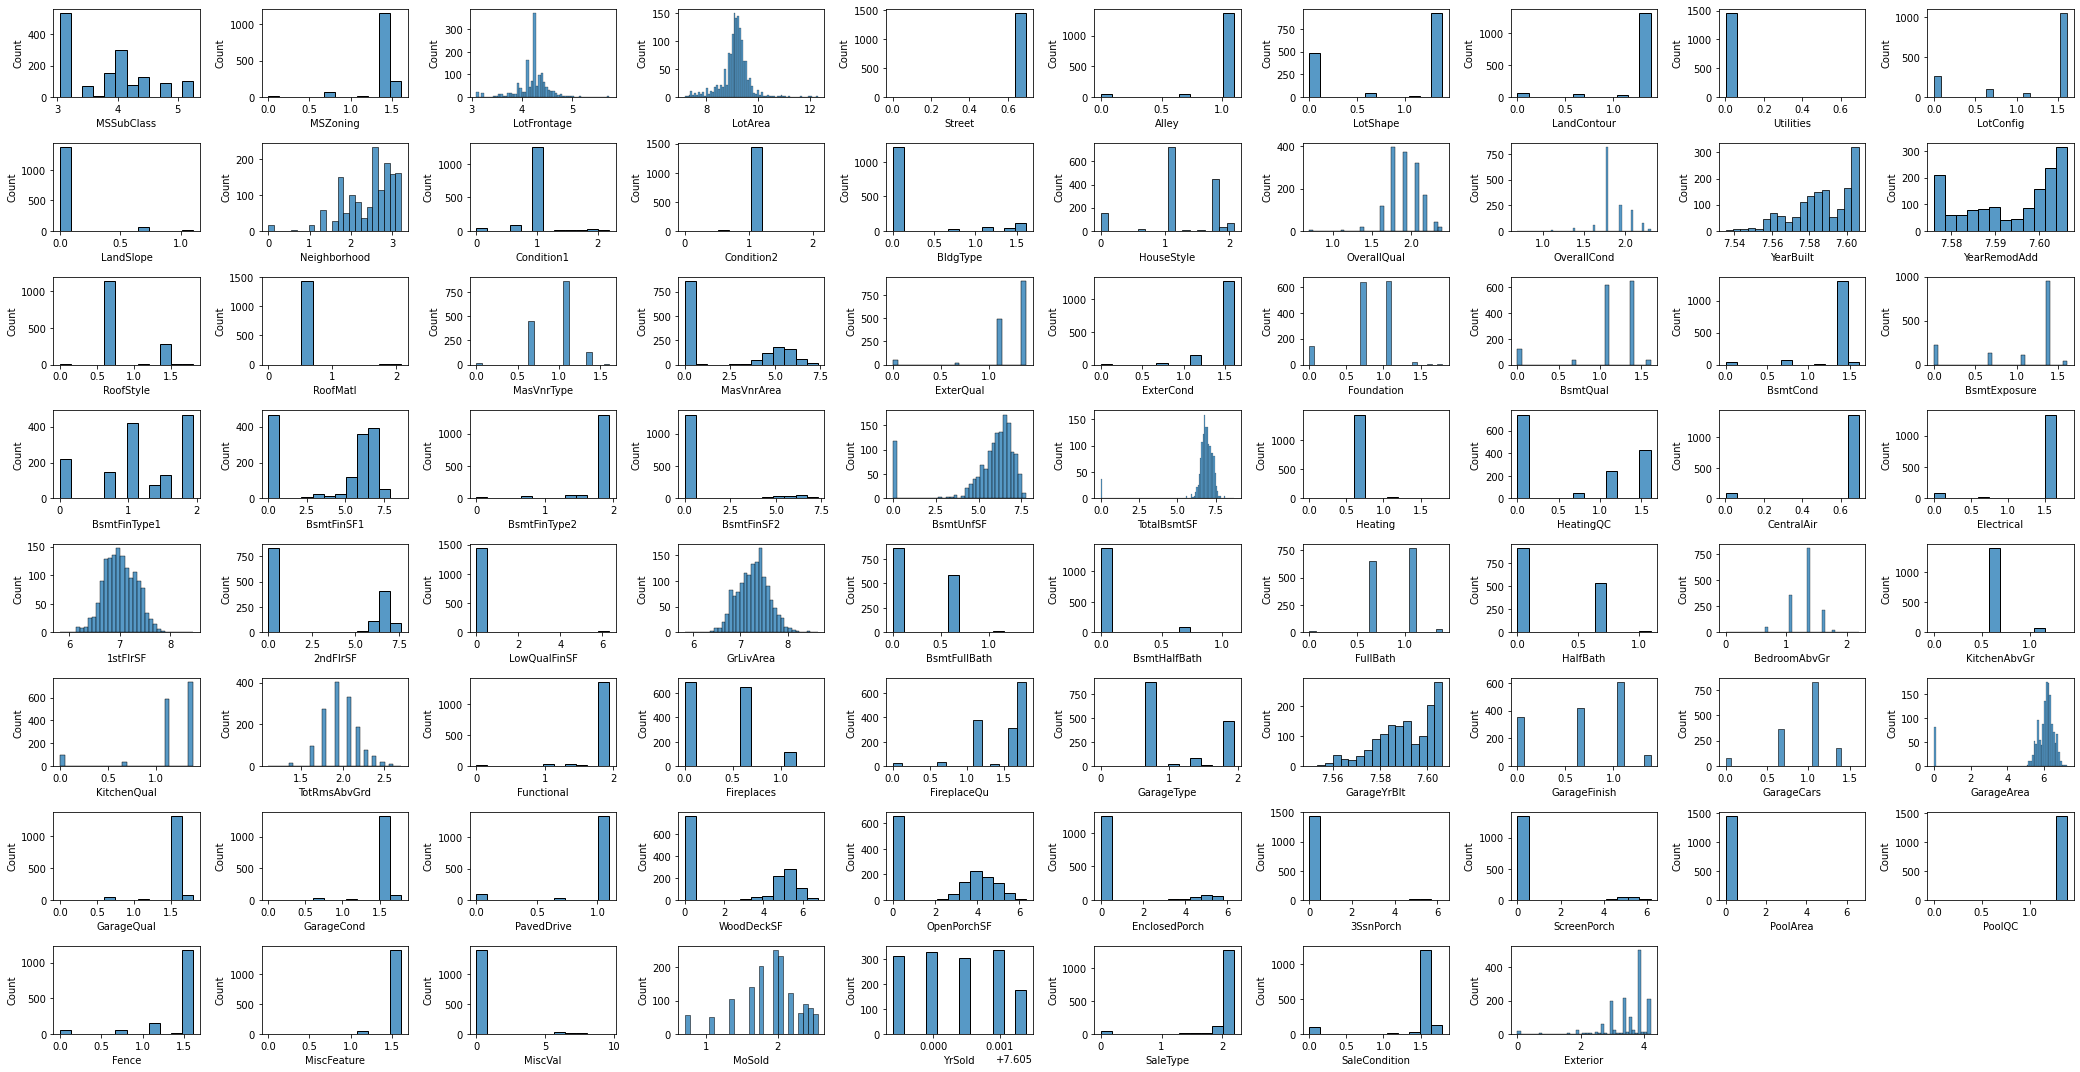

In [153]:
plt.figure(figsize=(29,15))

for i, feature in enumerate(train_features):
    plt.subplot(8, 10, i+1)
    sns.histplot(train1[feature])
    plt.tight_layout()

### Modeling

In [154]:
X_train, X_test, y_train, y_test = train_test_split(train1, y, random_state=RANDOM_STATE, test_size= TEST_SIZE)

In [155]:
lr1 = LinearRegression()

In [156]:
lr1.fit(X_train, y_train)

LinearRegression()

In [157]:
lr1_preds = lr1.predict(X_test)

In [160]:
print(f'Training : {lr1.score(X_train, y_train)}')
print(f'Testing  : {lr1.score(X_test, y_test)}')

Training : 0.8498195258132317
Testing  : 0.8277204449876873


MAE : 22055.137207967426
MSE : 1202182887.9688194
R2  :0.8277204449876873
MAPE:0.13120303210320716



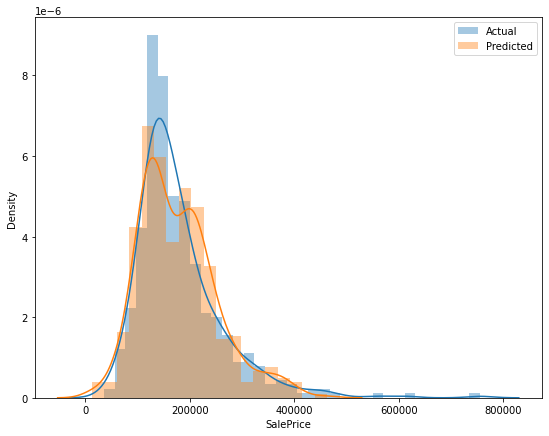

In [158]:
eval(y_test, lr1_preds)

#### Better Training and Testing score

In [163]:
from catboost import CatBoostRegressor
cbr = CatBoostRegressor(verbose =200)

In [164]:
cbr.fit(X_train, y_train)

Learning rate set to 0.041084
0:	learn: 75611.7193828	total: 60.3ms	remaining: 1m
200:	learn: 17209.2709686	total: 636ms	remaining: 2.53s
400:	learn: 11500.1887605	total: 1.2s	remaining: 1.79s
600:	learn: 8386.5716567	total: 1.77s	remaining: 1.18s
800:	learn: 6514.3767368	total: 2.34s	remaining: 582ms
999:	learn: 5219.5944478	total: 2.92s	remaining: 0us


In [165]:
cbr_pred = cbr.predict(X_test)

In [166]:
print(f'Training : {cbr.score(X_train, y_train)}')
print(f'Testing  : {cbr.score(X_test, y_test)}')

Training : 0.9954733198337394
Testing  : 0.9119932294410434


MAE : 14819.4387589486
MSE : 614119496.557872
R2  :0.9119932294410434
MAPE:0.08801455544875962



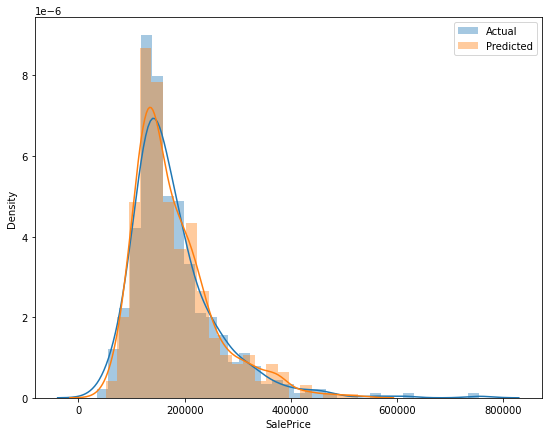

In [167]:
eval(y_test, cbr_pred)

### Even better preds with CatBoost Regressor